In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [4]:
plt.style.use('ggplot')
sns.set_style('darkgrid')

In [5]:
data = pd.read_csv('datasets_84803_196262_BankNote_Authentication.csv')

In [7]:
data.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


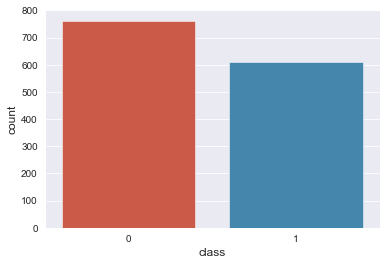

In [10]:
sns.countplot(data['class'])

In [11]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


C:\Users\hp\Anaconda3.0\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3.0\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


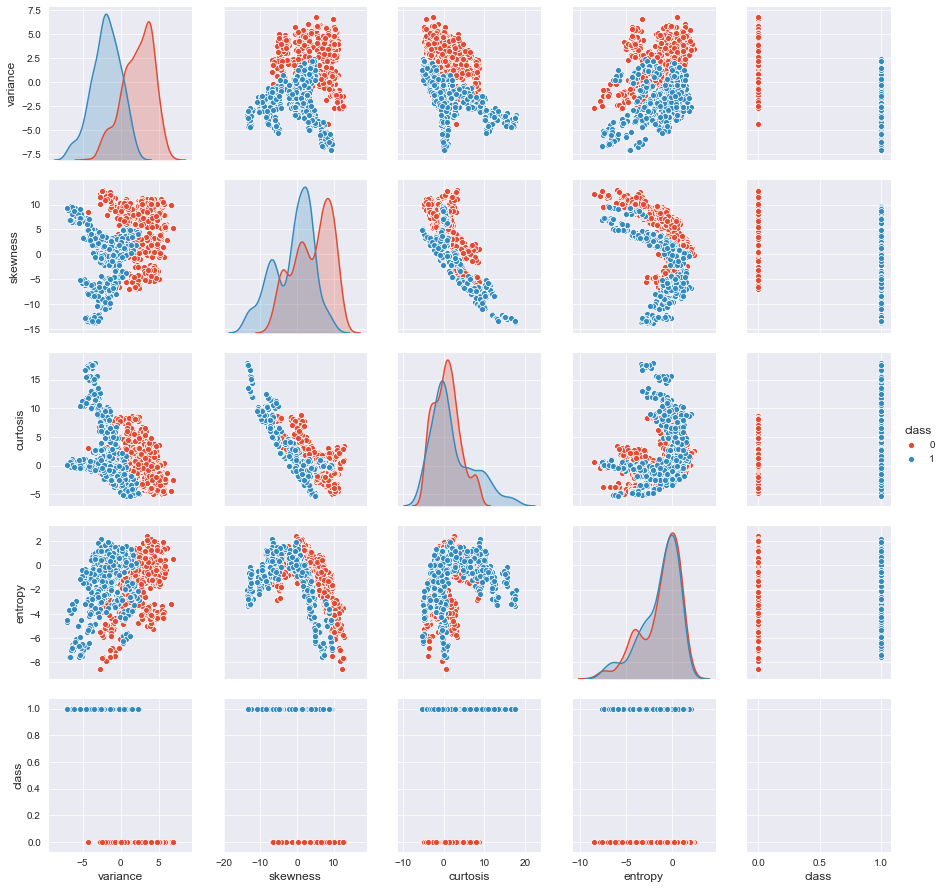

In [17]:
sns.pairplot(data,hue='class')

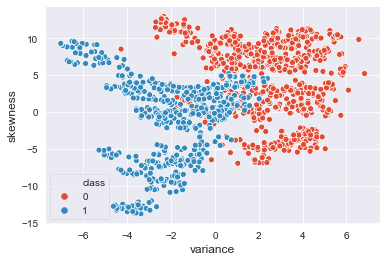

In [19]:
sns.scatterplot('variance','skewness',data=data,hue='class')

In [20]:
data_copy=data

In [23]:
data_copy.corr() 

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [24]:
#curtosis is most corelated to the class...

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X = data.drop('class',axis=1)
y = data['class']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train,y_train)

C:\Users\hp\Anaconda3.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
pred = model.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

